<a href="https://colab.research.google.com/github/gauravpks/dl-repo/blob/master/ANN/ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression using Sequential API

In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.4.0


In [2]:
# Other imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [8]:
# Make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # uniformly distributed between (-3, +3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

This implements the function:

$$ y = \cos(2x_1) + cos(3x_2) $$

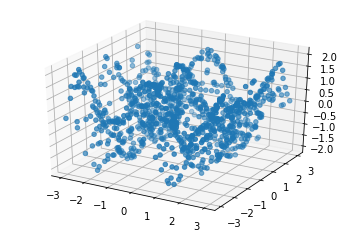

In [9]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
# plt.show()

In [4]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
  tf.keras.layers.Dense(1)
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               384       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile and fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 2ms/step - loss: 1.0090
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9035
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8629
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8766
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8528
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7150
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7208
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6109
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6305
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5301
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5494
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5288
Epoch 13/100
32/32 [=================

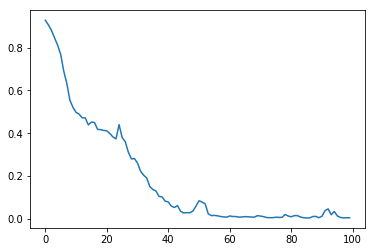

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

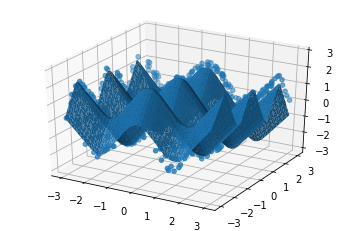

In [11]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

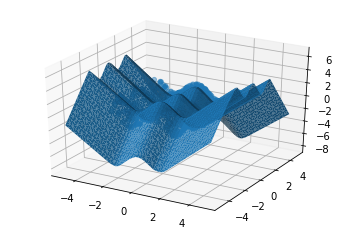

In [12]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

Let's load, split and scale the California housing dataset

In [16]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [17]:
np.random.seed(42)
tf.random.set_seed(42)

In [22]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [20]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.2656 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7413 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6604 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6245 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5770 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5609 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5500 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5200 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5051 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4910 - val_loss: 0.4656

In [25]:
history.history

{'loss': [1.6418712139129639,
  0.704696536064148,
  0.6345420479774475,
  0.5977364182472229,
  0.5706290006637573,
  0.5472458004951477,
  0.5287573933601379,
  0.513012170791626,
  0.4991583228111267,
  0.48749932646751404,
  0.47773411870002747,
  0.46876275539398193,
  0.46150994300842285,
  0.4547175168991089,
  0.44877079129219055,
  0.44347065687179565,
  0.4388773739337921,
  0.43465664982795715,
  0.4306176006793976,
  0.4273228049278259],
 'val_loss': [0.8559520840644836,
  0.6530762910842896,
  0.6098976731300354,
  0.5658424496650696,
  0.5354601144790649,
  0.5173057913780212,
  0.508107602596283,
  0.47992199659347534,
  0.46895653009414673,
  0.4656362533569336,
  0.44823721051216125,
  0.4479142725467682,
  0.42957568168640137,
  0.42329978942871094,
  0.41755104064941406,
  0.41229447722435,
  0.4071497917175293,
  0.4036763608455658,
  0.400029718875885,
  0.39693641662597656]}

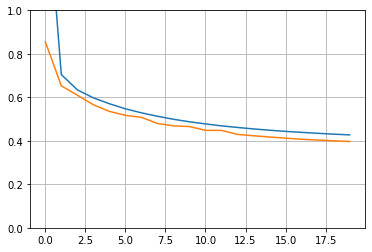

In [23]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()